# Preprocessing C159

This notebook visualizes and compiles the input data for the combined retrieval from flight B984.

In [1]:
%load_ext autoreload
%autoreload 2
from joint_flight.notebook import *
from joint_flight import plot_observations
from joint_flight.data.c159 import *

No environment variable JOINT_FLIGHT_PATH found. Will look in /home/simonpf/src/joint_flightfor the joint flight data.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)
/home/simonpf/build/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:1026: RuntimeWarning: overflow encountered in add
  result = self.f(da, db, *args, **kwargs)


## Overview

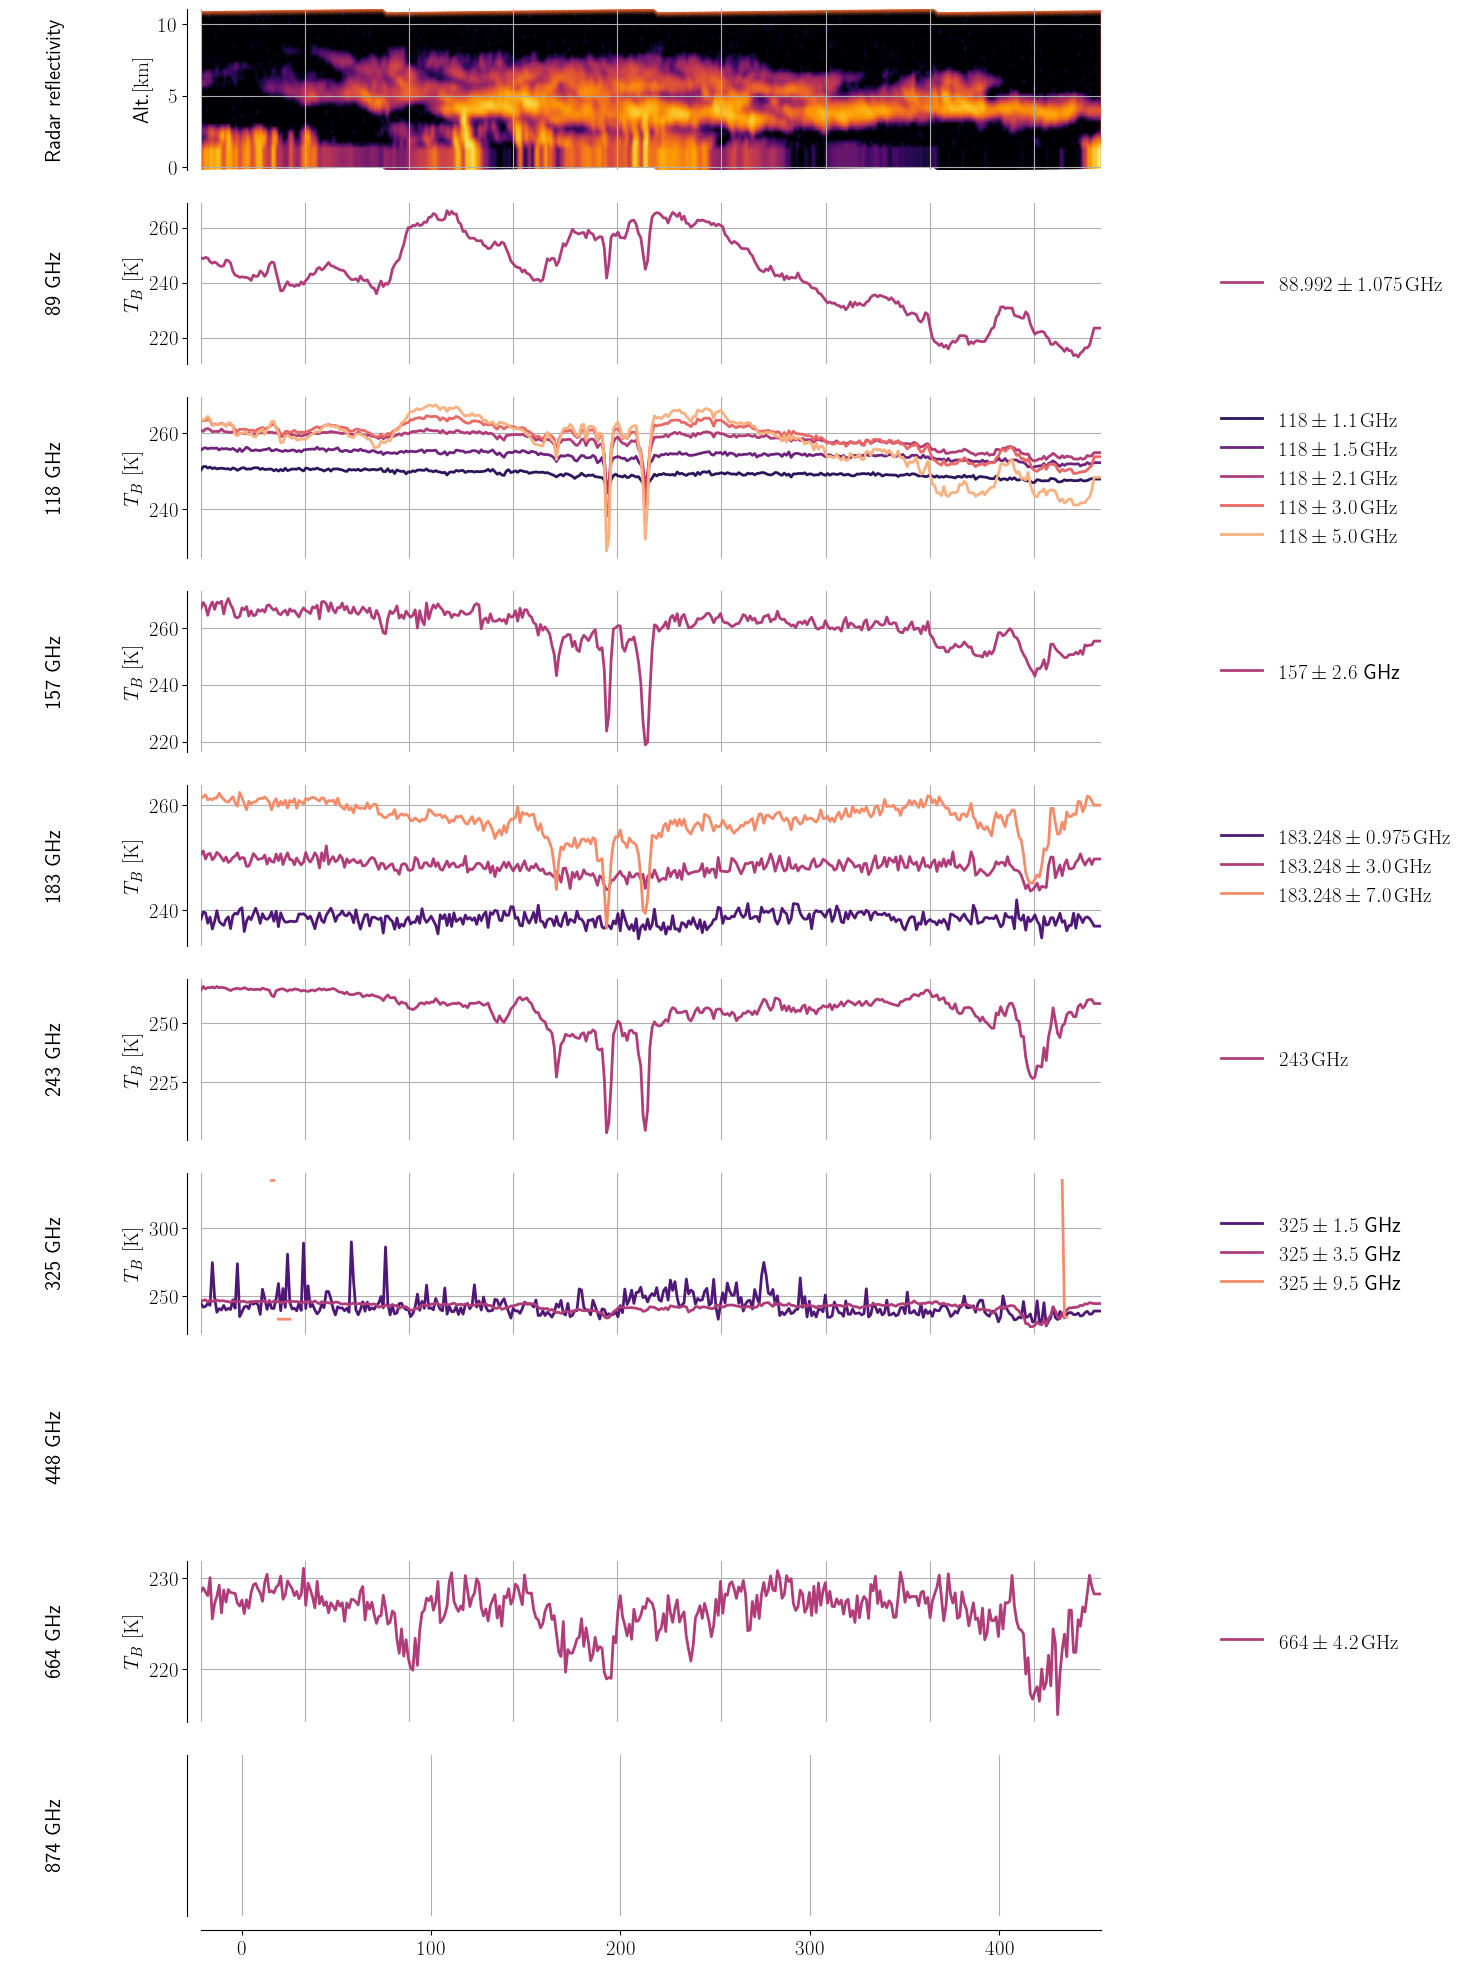

In [2]:
from matplotlib.gridspec import GridSpec
f = plt.figure(figsize=(15, 20))
gs = GridSpec(10, 3, width_ratios=[0.1, 1.0, 0.1])
axs = [f.add_subplot(gs[i, 1]) for i in range(10)]
legends = [f.add_subplot(gs[i, 2]) for i in range(10)]
names = [f.add_subplot(gs[i, 0]) for i in range(10)]


plot_observations(
    ISMAR, MARSS, RADAR, axs=axs,
    legends=legends,
    missing_channels=[14, 15, 16, 20],
    names=names
)
plt.show()

## Atmospheric background

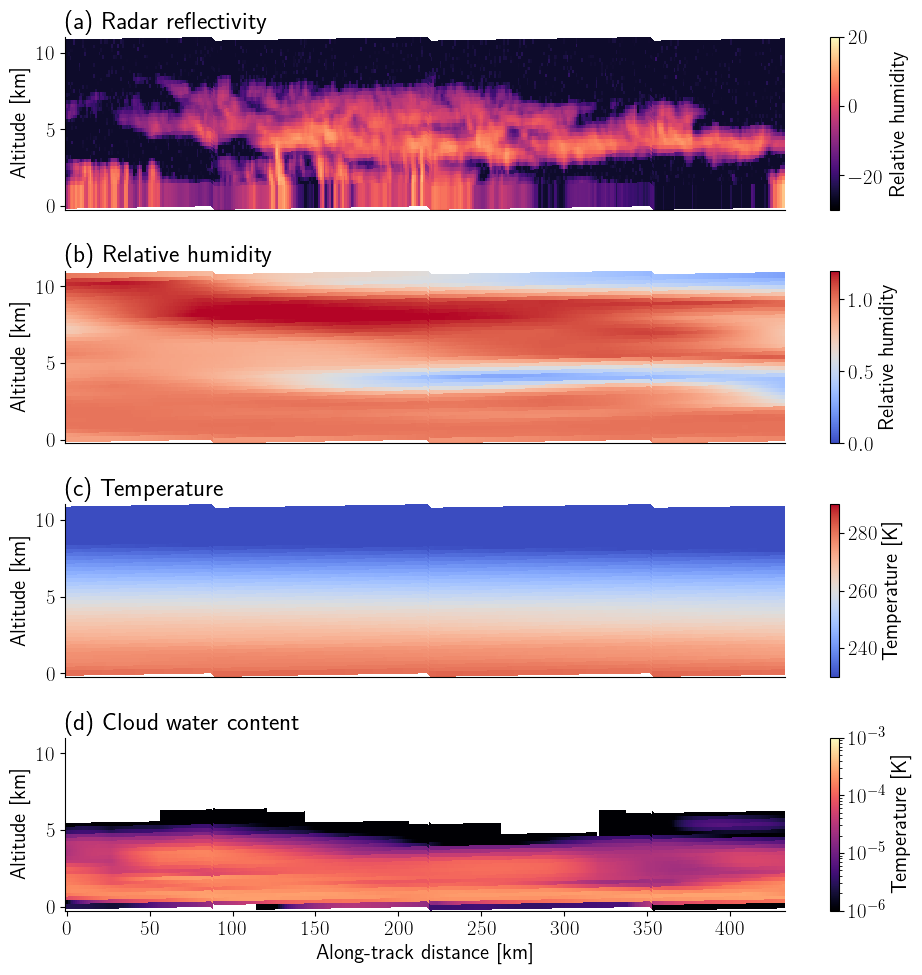

In [3]:
from joint_flight import plot_atmosphere
from matplotlib.colors import Normalize, LogNorm

axs = plot_atmosphere(RADAR, ATMOSPHERE)

## Observations
### Marss

In [4]:
from matplotlib.colors import Normalize

def plot_channels(data, names):
    f, axs = plt.subplots(2, 1)
    
    x = RADAR.d / 1e3
    x_min = x.min()
    x_max = x.max()
    
    ax = axs[0]
    for d, n in zip(data, names):
        ax.plot(x, d, label=n)
    ax.legend(bbox_to_anchor=[1.0, 0.5])
    ax.set_xlim([x_min, x_max])
        
    ax = axs[1]
    y = RADAR.y
    x = RADAR.x / 1e3
    dbz = RADAR.dbz
    
    print(dbz)
    ax.pcolormesh(x, y / 1e3, dbz, norm=Normalize(-20, 20))
    ax.set_ylim(0, 11)
    ax.set_xlim([x_min, x_max])
    plt.show()

In [5]:
MARSS

<xarray.Dataset>
Dimensions:                  (rays: 396, channel: 5)
Coordinates:
  * channel                  (channel) |S9 b'M16-89' b'M17-157' ... b'M20-183+7'
Dimensions without coordinates: rays
Data variables:
    latitude                 (rays) float32 59.52 59.53 59.53 ... 63.17 63.17
    longitude                (rays) float32 -2.352 -2.359 ... -4.906 -4.906
    brightness_temperatures  (rays, channel) float32 249.0 266.8 ... 249.7 260.0
    errors                   (rays, channel) float32 0.007529 0.0141 ... 0.02367
    altitude                 (rays) float32 9.769e+03 9.77e+03 ... 9.564e+03
    time                     (rays) datetime64[ns] 2019-03-19T13:06:45.781250...

In [6]:
n_rays = RADAR.d.size
y_marss = np.zeros((n_rays, 5))
y_marss_nedt = np.zeros((n_rays, 5))
tbs_marss = MARSS["brightness_temperatures"]
errors_marss = MARSS["errors"]

### 89 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


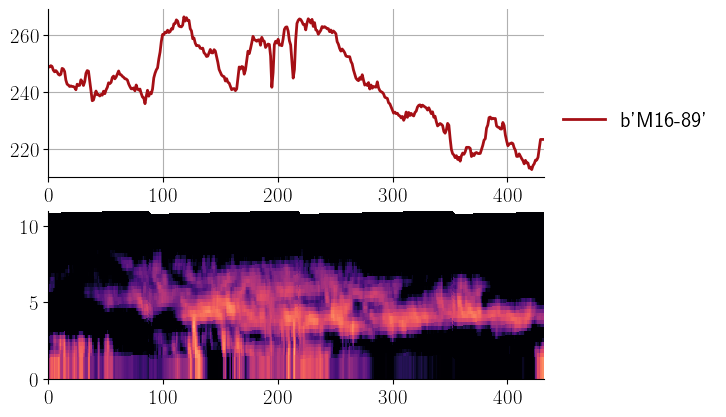

In [7]:
data = [
    tbs_marss[:, 0],
]
names = map(lambda x: x.data, MARSS.channel[:1])
plot_channels(data, names)

In [8]:
y_marss[:, 0] = tbs_marss[:, 0]
y_marss_nedt[:, 0] = errors_marss[:, 0] + 1e6 * SURFACE_MASK.data

### 157 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


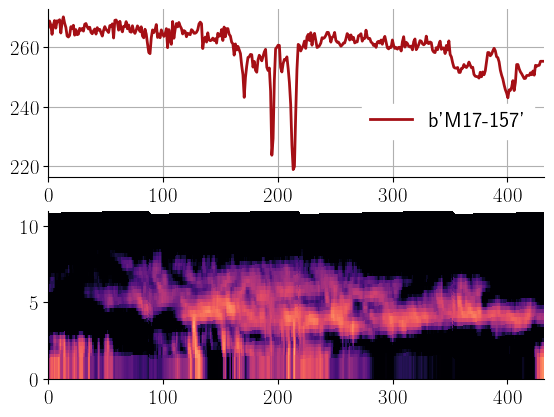

In [9]:
data = [
    tbs_marss[:, 1],
]
names = map(lambda x: x.data, MARSS.channel[1:2])
plot_channels(data, names)

In [10]:
y_marss[:, 1] = tbs_marss[:, 1]
y_marss_nedt[:, 1] = errors_marss[:, 1] + 1e6 * SURFACE_MASK.data

### 183 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


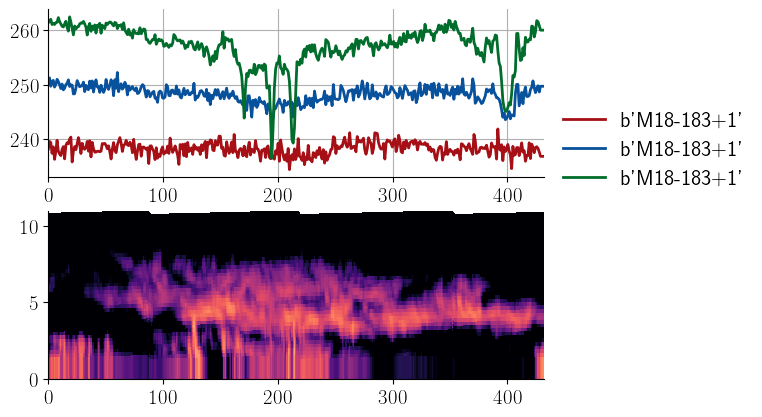

In [11]:
data = [
    tbs_marss[:, 2:],
]
names = map(lambda x: x.data, MARSS.channel[2:])
plot_channels(data, names)

In [12]:
y_marss[:, 2:] = tbs_marss[:, 2:]
y_marss_nedt[:, 2:] = errors_marss[:, 2:]

## ISMAR

In [13]:
y_ismar = np.zeros((n_rays, 12))
y_ismar_nedt = np.zeros((n_rays, 12))
tbs_ismar = ISMAR.brightness_temperatures.data
errors_ismar = ISMAR.errors.data

### 118 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


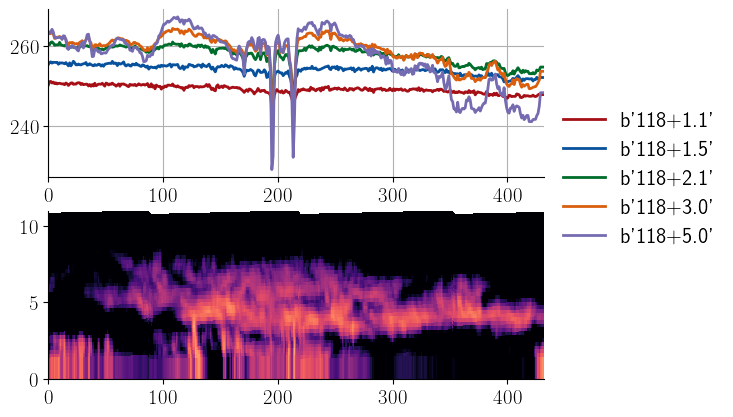

In [14]:
data = [
    tbs_ismar[:, 0],
    tbs_ismar[:, 1],
    tbs_ismar[:, 2],
    tbs_ismar[:, 3],
    tbs_ismar[:, 4],
]
names = map(lambda x: x.data, ISMAR.channel[:5])
plot_channels(data, names)

In [15]:
y_ismar[:, :5] = tbs_ismar[:, :5]
y_ismar_nedt[:, :5] = errors_ismar[:, :5]
y_ismar_nedt[:, 4] += SURFACE_MASK.data * 1e6

### 243 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


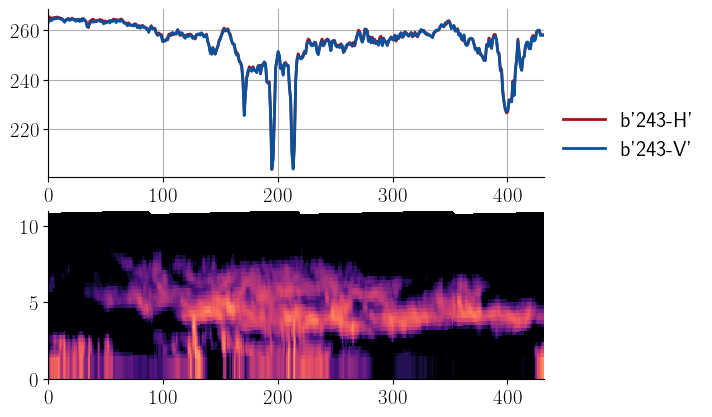

In [16]:
data = [
    tbs_ismar[:, 5],
    tbs_ismar[:, 6]
]
names = map(lambda x: x.data, ISMAR.channel[5:7])
plot_channels(data, names)

In [17]:
y_ismar[:, 5] = 0.5 * (tbs_ismar[:, 5] + tbs_ismar[:, 6])
y_ismar_nedt[:, 5] = 1.0 / np.sqrt(2) * errors_ismar[:, 5]

### 243 GHz - 30$^\circ$

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


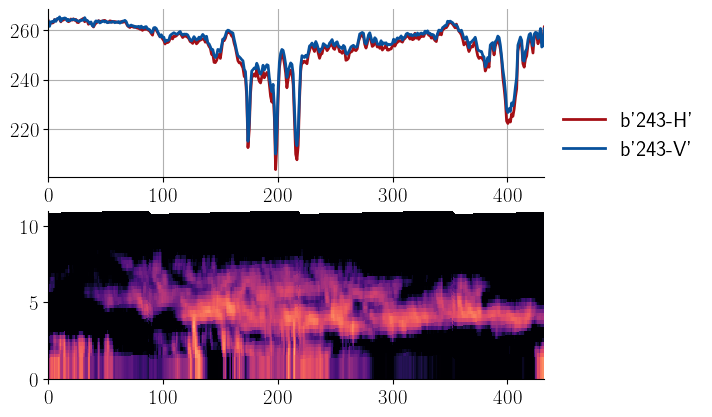

In [18]:
from joint_flight.data.c159 import ISMAR_30

tbs_ismar_30 = ISMAR_30["brightness_temperatures"].data
data = [
    tbs_ismar_30[:, 5],
    tbs_ismar_30[:, 6]
]
names = map(lambda x: x.data, ISMAR.channel[5:7])
plot_channels(data, names)

### 325 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


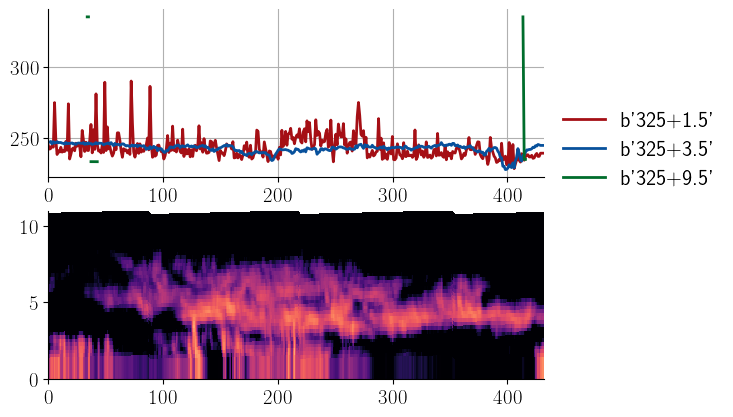

In [19]:
data = [
    tbs_ismar[:, 7],
    tbs_ismar[:, 8],
    tbs_ismar[:, 9],
]
names = map(lambda x: x.data, ISMAR.channel[7:10])
plot_channels(data, names)

In [20]:
y_ismar[:, 6] = tbs_ismar[:, 8]
y_ismar_nedt[:, 6] = errors_ismar[:, 8]

### 424 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


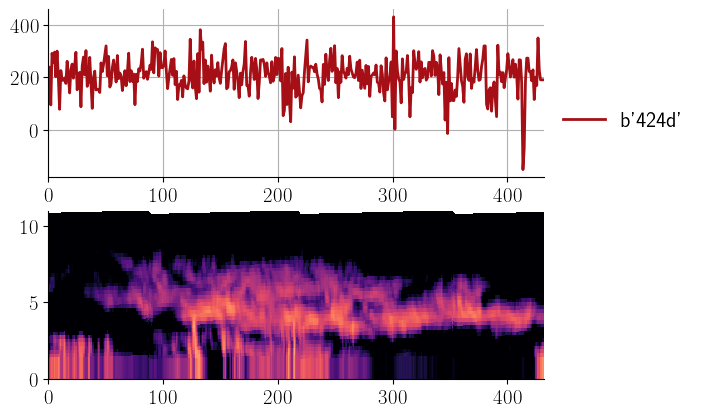

In [21]:
data = [
    tbs_ismar[:, 13]
]
names = map(lambda x: x.data, ISMAR.channel[[13]])
plot_channels(data, names)

### 448 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


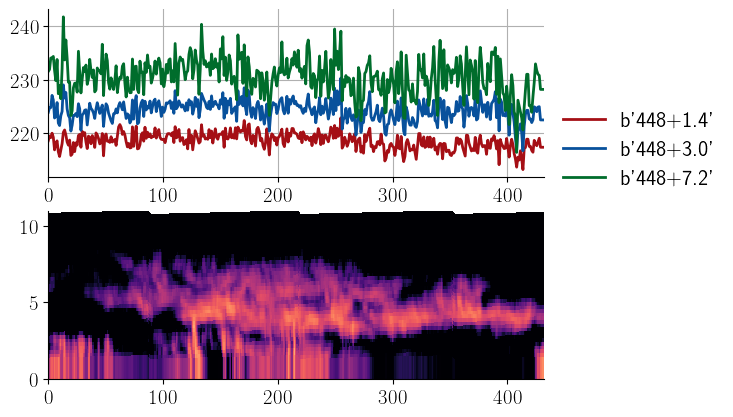

In [22]:
data = [
    tbs_ismar[:, 14],
    tbs_ismar[:, 15],
    tbs_ismar[:, 16],
]
names = map(lambda x: x.data, ISMAR.channel[14:17])
plot_channels(data, names)

In [23]:
y_ismar[:, 7:10] = tbs_ismar[:, 14:17]
y_ismar_nedt[:, 7:10] = errors_ismar[:, 14:17]

### 664 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


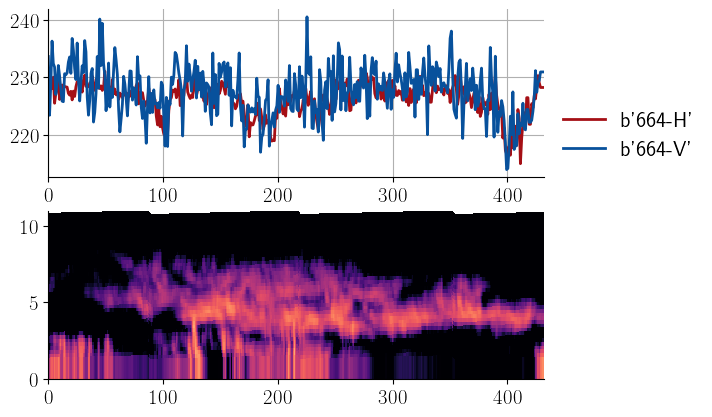

In [24]:
data = [
    tbs_ismar[:, 17],
    tbs_ismar[:, 18],
]
names = map(lambda x: x.data, ISMAR.channel[17:19])
plot_channels(data, names)

In [25]:
y_ismar[:, 10] = tbs_ismar[:, 17]
y_ismar_nedt[:, 10] = errors_ismar[:, 17]

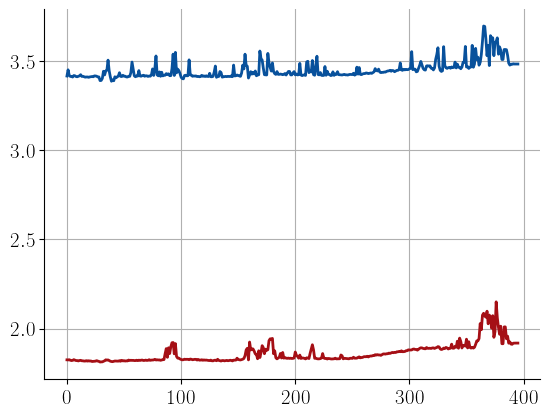

In [26]:
plt.plot(errors_ismar[:, 17])
plt.plot(errors_ismar[:, 18])
plt.show()

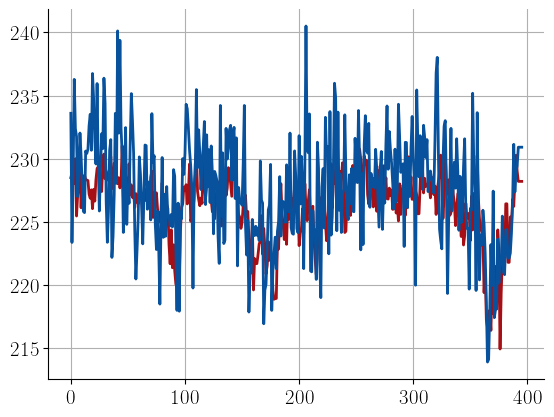

In [27]:
plt.plot(y_ismar[:, 10])
plt.plot(tbs_ismar[:, 18])
plt.show()

In [28]:
plt.plot(errors_ismar[:, 18])
plt.plot(errors_ismar[:, 19])

### 874 GHz

<xarray.DataArray 'dbz' (time: 396, bins: 45)>
array([[ -6.58,  -6.58,  -6.58, ..., -26.  , -26.  , -26.  ],
       [ -0.84,  -0.84,  -0.84, ..., -26.  , -26.  , -26.  ],
       [  4.53,   4.53,   4.53, ..., -25.42, -26.  , -26.  ],
       ...,
       [  8.94,   8.94,   8.94, ..., -26.  , -26.  , -26.  ],
       [ 10.25,  10.25,  10.25, ..., -26.  , -26.  , -26.  ],
       [ 14.14,  14.14,  14.14, ..., -26.  , -26.  , -26.  ]])
Coordinates:
  * time     (time) datetime64[ns] 2019-03-19T13:01:28 ... 2019-03-19T13:02:31
Dimensions without coordinates: bins


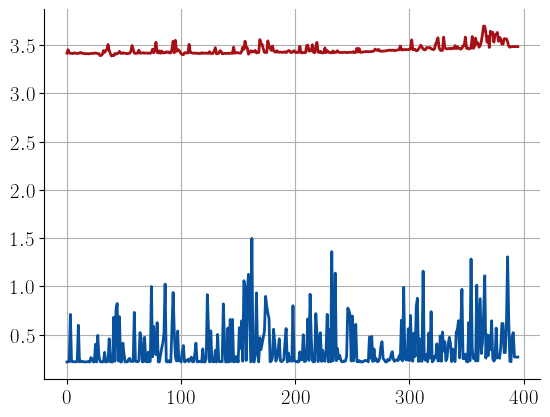

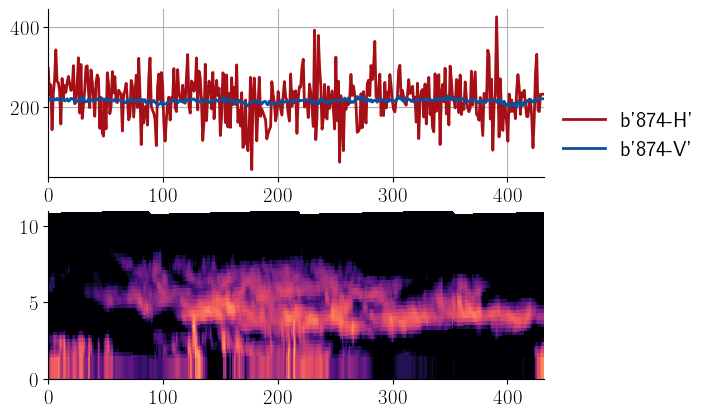

In [29]:
data = [
    tbs_ismar[:, 19],
    tbs_ismar[:, 20],
]
names = map(lambda x: x.data, ISMAR.channel[19:])
plot_channels(data, names)

In [30]:
y_ismar[:, 11] = tbs_ismar[:, 20]
y_ismar_nedt[:, 11] = errors_ismar[:, 20]

In [31]:
%rm ../data/input_c159.nc

In [32]:
import xarray as xr
input_data = {
    # Atmosphere
    "latitude": (("rays",), RADAR.latitude.data),
    "longitude": (("rays",), RADAR.longitude.data),
    "altitude": (("rays", "levels",), RADAR.height.data),
    "pressure": (("rays", "levels"), ATMOSPHERE.pressure.data),
    "temperature": (("rays", "levels"), ATMOSPHERE.temperature.data),
    "cloud_water": (("rays", "levels"), ATMOSPHERE.cloud_water.data),
    #"H2O": (("rays", "levels"), ATMOSPHERE.relative_humidity / 100.0),
    "H2O": (("rays", "levels"), ATMOSPHERE.water_vapor.data),
    "H2O_xa": (("rays", "levels"), ATMOSPHERE.relative_humidity.data),
    "O2": (("rays", "levels"), ATMOSPHERE.oxygen.data),
    "O3": (("rays", "levels"), ATMOSPHERE.ozone.data),
    "N2": (("rays", "levels"), ATMOSPHERE.nitrogen.data),
    # Surface variables
    "sea_surface_temperature": (("rays",), ATMOSPHERE.sea_surface_temperature.data),
    "wind_u": (("rays",), ATMOSPHERE.u10.data),
    "wind_v": (("rays",), ATMOSPHERE.v10.data),
    "surface_wind_speed": (("rays",
                            np.sqrt(ATMOSPHERE.u10.data ** 2 +
                                    ATMOSPHERE.v10.data ** 2))),
    # Observations
    "y_cloud_sat": (("rays", "range_bins"), RADAR.dbz.data),
    "y_cloud_sat_nedt": (("rays", "range_bins"), 0.5 * np.ones_like(RADAR.dbz) + RADAR.nedt.data),
    "cloud_sat_range_bins": (("rays", "range_bin_boundaries"), RADAR.range_bins.data),
    "y_marss": (("rays", "marss_channels"), y_marss),
    "y_marss_nedt": (("rays", "marss_channels"), y_marss_nedt),
    "marss_sensor_position": (("rays",), MARSS.altitude.data),
    "marss_sensor_line_of_sight": (("rays",), 180 * np.ones(MARSS.altitude.size)),
    "y_ismar": (("rays", "ismar_channels"), y_ismar),
    "y_ismar_nedt": (("rays", "ismar_channels"), y_ismar_nedt),
    "ismar_sensor_position": (("rays",), ISMAR.altitude.data),
    "ismar_sensor_line_of_sight": (("rays",), 180 * np.ones(ISMAR.altitude.size))
}
dataset = xr.Dataset(input_data)
dataset.to_netcdf("../data/input_c159.nc")

In [33]:
data = xr.load_dataset("../data/input_c159.nc")

In [51]:
y_ismar_nedt[:, 9].mean()

1.8738944437166658

In [65]:
y_ismar_nedt[:, 9].mean()

1.3029799157320852

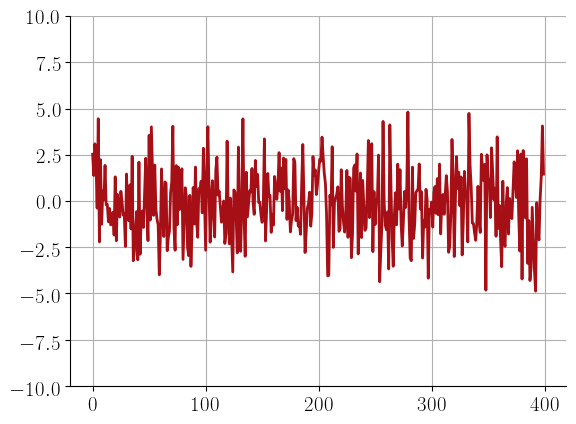

In [56]:
noise = 1.9 * np.random.normal(size=400)
plt.plot(noise)
plt.ylim([-10, 10])
plt.show()

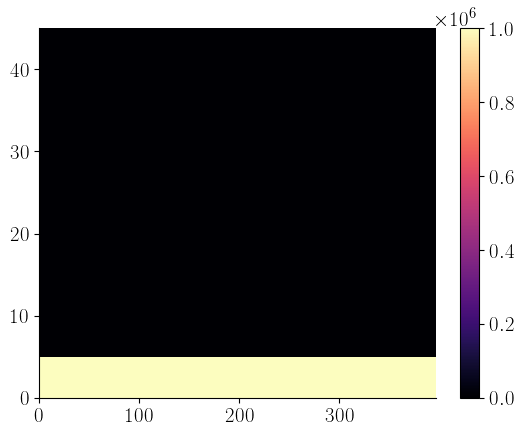

In [34]:
plt.pcolormesh(RADAR.nedt.T)
plt.colorbar()
plt.show()